In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme() 

In [2]:
elastic_net = pd.read_csv("./metrics/071_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/071_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/071_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/071_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/071_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/071_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/071_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/071_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.909910,18.315908,856.732800,29.269999,0.072156,0.094989,0.002000
0,Random Forest,0.908326,19.713520,871.801822,29.526290,0.078849,0.571213,0.012304
0,Decision Tree,0.891312,23.813520,1033.599068,32.149636,0.087307,0.007540,0.000813
0,Linear Regression,0.172425,70.510185,7870.069000,88.713410,0.252538,0.005055,0.000979
0,Lasso,0.171103,70.664650,7882.638000,88.784225,0.253795,0.033809,0.001000
0,Elastic Net,0.163374,72.151370,7956.135000,89.197170,0.260083,0.002001,0.001050
0,MLP,0.114343,73.747460,8422.411000,91.773700,0.262438,1.090507,0.003002
0,Logistic Regression,-0.261382,78.116550,11995.482000,109.523890,0.263943,1.022294,0.003004


In [6]:
metrics.to_csv("./metrics/072_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


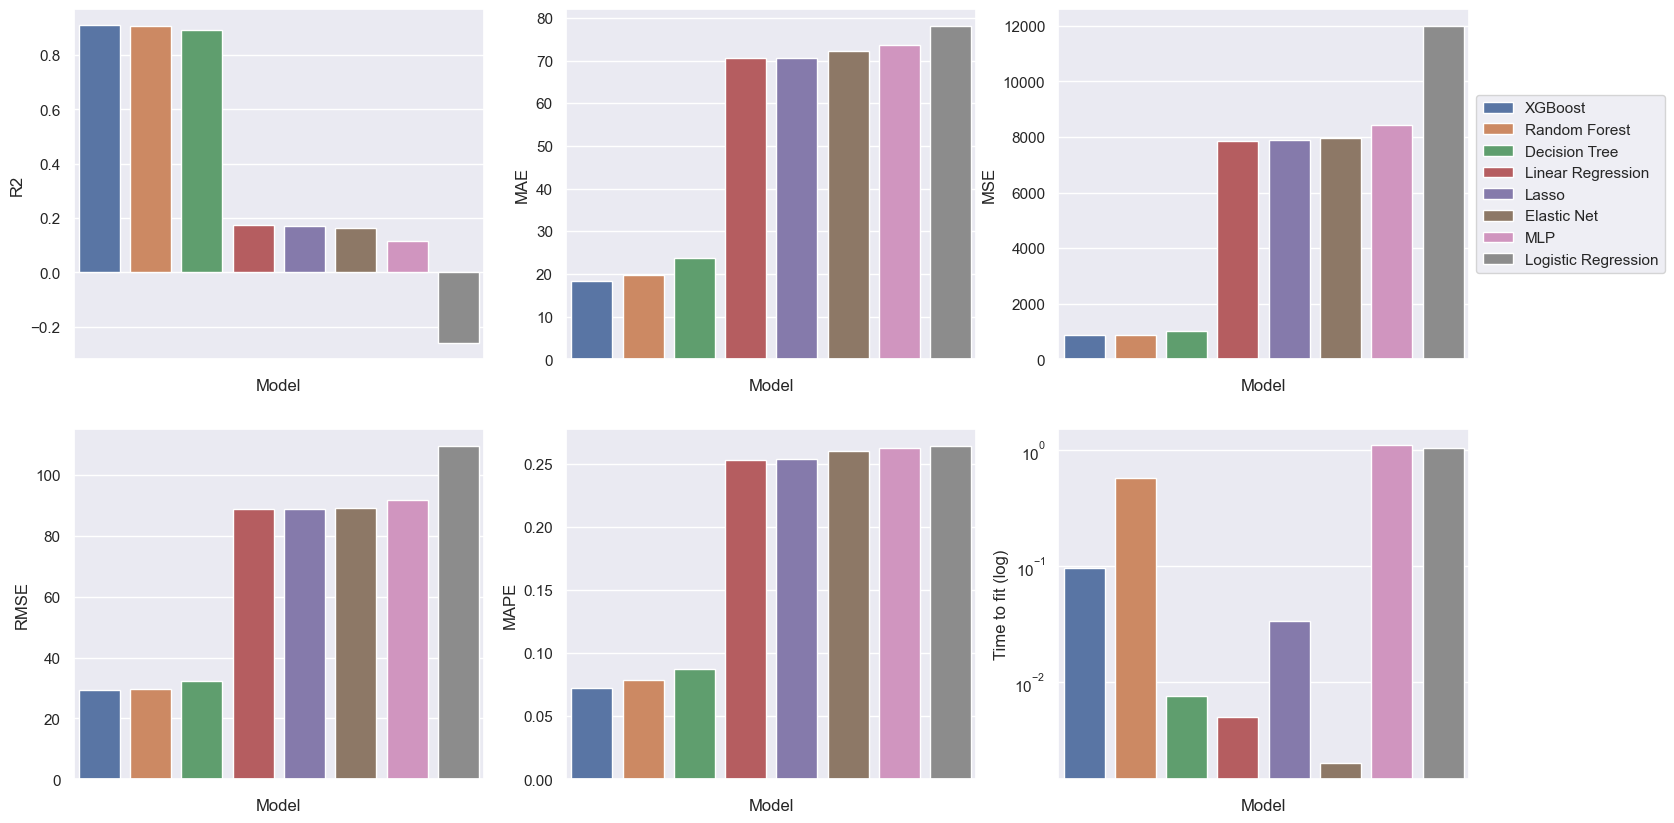

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/072_yonge_count_weather_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/072_yonge_count_weather_metrics.png",bbox_inches="tight")